# 1 Importing python packages

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# 2 Exploratory Data Analysis

source of data: https://www.kaggle.com/datasets/ychope/loan-approval-dataset/data

## 2.1 Checking the basic info of the data

check: info, shape, variable types and description

In [4]:
# loading dataset into pandas dataframe
# set header to 0 to keep feature names
# set header to 1 to drop feature names

df_loan = pd.read_csv("data\Loan.csv", delimiter=",", header=0)

In [5]:
print(df_loan.columns)

Index(['Unnamed: 0', 'id', 'year', 'loan_limit', 'gender', 'approv_in_adv',
       'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1', 'high_interest_rate', 'senior_age'],
      dtype='object')


In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   credit_worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           148670 non-null  float64
 13  interest_rate_spread       11


 0   Unnamed: 0 
 1   id  
 2   year 
 3   loan_limit
 4   gender    
 5   approv_in_adv 
 6   loan_type 
 7   loan_purpose 
 8   credit_worthiness    
 9   open_credit 
 10  business_or_commercial 
 11  loan_amount              
 12  rate_of_interest           
 13  interest_rate_spread  
 14  upfront_charges         
 15  term                    
 16  neg_ammortization      
 17  interest_only            
 18  lump_sum_payment    
 19  property_value      
 20  construction_type
 21  occupancy_type
 22  secured_by
 23  total_units
 24 income
 25 credit_type
 26 credit_score
 27 co-applicant_credit_type
 28 age
 29 submission_of_application
 30 ltv
 31 region
 32 security_type
 33 status
 34 dtir1
 35  high_interest_rate         
 36  senior_age               

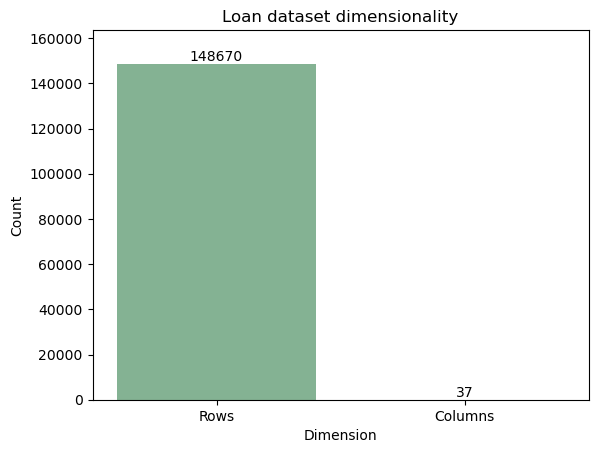

In [7]:
# type((df_loan.shape)) is a tuple

n_rows, n_cols = df_loan.shape
data_dimensionality = {"Dimension": ["Rows", "Columns"], "Count": [n_rows, n_cols]}
# load data into a DataFrame object
df_dimensionality = pd.DataFrame(data_dimensionality)

sns.set_palette("crest")
ax = sns.barplot(data=df_dimensionality, x="Dimension", y="Count")


for container in ax.containers:
    ax.bar_label(container, fontsize=10)
ax.margins(y=0.1)

plt.title("Loan dataset dimensionality")
plt.show()

### 2.1.1 Check data types

In [8]:
type(df_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   credit_worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           148670 non-null  float64
 13  interest_rate_spread       11

NoneType

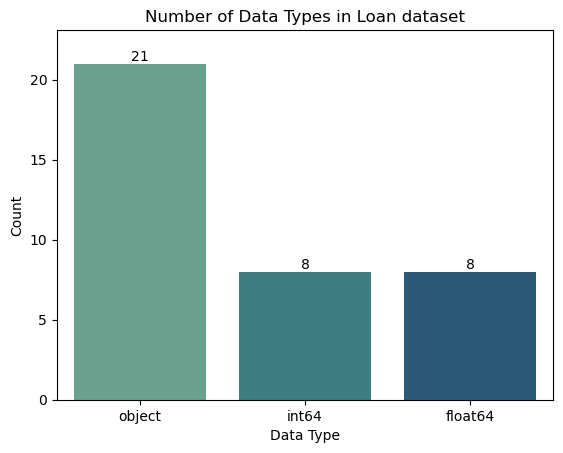

In [9]:
# count the data types
dtype_count = df_loan.dtypes.value_counts()

# add new index to make it into a Dataframe by reset_index()
df_dtypes = dtype_count.reset_index()

# rename the colums in the new Dataframe
df_dtypes = df_dtypes.set_axis(["Data Type", "Count"], axis=1)

ax = sns.barplot(df_dtypes, x="Data Type", y="Count", palette="crest", hue="Data Type")

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.margins(y=0.1)
plt.title("Number of Data Types in Loan dataset")
plt.show()

In [10]:
# Conclusion:
# it's a heterogenous dataset as it presents nomerical and categorical features

### 2.1.2 Check Missing values

In [11]:
# create a dictionary to store feature names + number null values
null_values: dict[str, int] = {}
for var in df_loan.columns:
    nr: int = df_loan[var].isnull().sum()
    if nr > 0:
        null_values[var] = nr

# convert Dictionary into a Dataframe
df_count_null_val = pd.DataFrame(
    null_values.items(), columns=["Features", "Number of null values"]
)

# sort the Dataframe
df_count_null_val_sorted = df_count_null_val.sort_values(
    ["Number of null values"], ascending=False
).reset_index(drop=True)

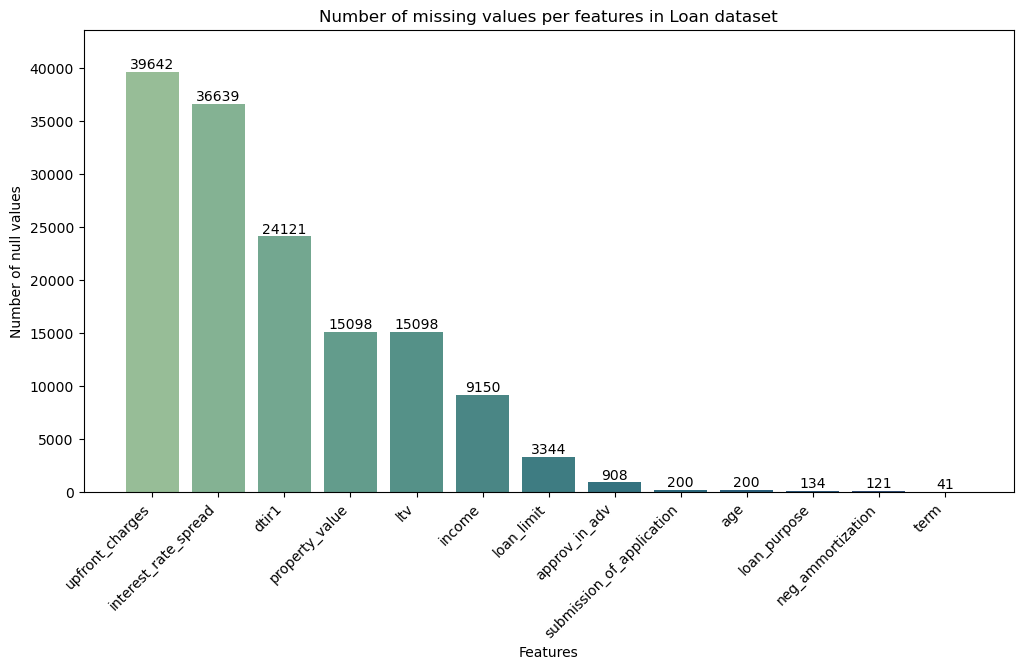

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    df_count_null_val_sorted,
    x=df_count_null_val_sorted.columns[0],
    y=df_count_null_val_sorted.columns[1],
    palette="crest",
    hue="Features",
)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

ax.autoscale_view()
ax.margins(y=0.1)
plt.xticks(rotation=45, ha="right")
plt.title("Number of missing values per features in Loan dataset")
plt.show()


In [13]:
## Counting missing and valid values in the Dataframe

missing_val_count = df_loan.isnull().sum().sum()
print(f"Total missing values {missing_val_count} in the dataframe")

valid_val_count = df_loan.notnull().sum().sum()
print(f"Total valid values {valid_val_count} in the dataframe")

## Overall missing rate of the dataset
overall_missing_rate = round(missing_val_count / valid_val_count * 100, 2)
print(f"Missing rate {overall_missing_rate}%")

# reminder: plotting barchart

Total missing values 144696 in the dataframe
Total valid values 5356094 in the dataframe
Missing rate 2.7%


In [14]:
## Number of complete rows where no missing values occur
complete_row_count = df_loan.notna().all(axis=1).sum()
print(f"The number of complete rows is: {complete_row_count}")
print(
    f"{(complete_row_count / len(df_loan)) * 100:.2f}%  of the rows are complete in the dataframe"
)

# reminder: plotting barchart

The number of complete rows is: 98187
66.04%  of the rows are complete in the dataframe


In [15]:
## Check duplicated rows
duplicated_row_count = df_loan.duplicated().sum()

# reminder: plotting barchart

## 2.2 Exploratory Data Analysis for numerical features

In [16]:
# select only numeric-type values
df_loan_numeric = df_loan.select_dtypes(include=[np.number])
df_loan_numeric

,Unnamed: 0,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1,high_interest_rate,senior_age
0,126324,151214,2019,986500,4.125,0.6174,9825.00,360.0,1408000.0,13380.0,864,70.063920,0,42.0,1,0
1,13385,38275,2019,406500,3.625,-0.1990,1100.00,360.0,1008000.0,5640.0,505,40.327381,0,40.0,0,1
2,98606,123496,2019,166500,4.250,0.7779,2379.51,180.0,338000.0,4740.0,829,49.260355,0,29.0,1,1
3,7184,32074,2019,206500,5.625,1.1174,6117.50,360.0,278000.0,3780.0,763,74.280576,0,44.0,1,0
4,120745,145635,2019,166500,3.500,0.1533,779.88,360.0,168000.0,2400.0,886,99.107143,0,42.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,82796,107686,2019,156500,3.875,0.4172,4370.00,360.0,198000.0,2460.0,670,79.040404,0,37.0,0,1
148666,25109,49999,2019,106500,4.125,1.8843,3007.81,240.0,128000.0,8460.0,720,83.203125,0,22.0,1,1
148667,136462,161352,2019,256500,3.990,0.7559,1688.89,240.0,528000.0,3720.0,775,48.579545,0,49.0,0,1
148668,116343,141233,2019,326500,4.125,0.6865,4475.75,360.0,378000.0,5400.0,787,86.375661,0,38.0,1,0


### 2.2.1 Variability of numeric values

In [17]:
# axis=0 means counting unique values feature by feature (column by column)
df_loan_numeric.nunique(axis=0)

Unnamed: 0              148670
id                      148670
year                         1
loan_amount                211
rate_of_interest           132
interest_rate_spread     22516
upfront_charges          58271
term                        26
property_value             385
income                    1001
credit_score               401
ltv                       8484
status                       2
dtir1                       57
high_interest_rate           2
senior_age                   2
dtype: int64

In [18]:
# Concolusion:
#  'Unnamed:0', 'id' and 'year' columns aren't necessary, they do not bring any valuable info to the table
#   we can drop them
df_loan_numeric.drop(columns=["Unnamed: 0", "id", "year"], inplace=True)

# the features status, high_interest_rate, senior_age have variability of two
# thus we need two check the distribution of the values
# see it below

### 2.2.2 Univariate analysis for numerical data

In [19]:
# numeric_colum_names = df_loan_numeric.columns
n = len(df_loan_numeric.columns)
print(n)
cols = 3

# round a number up to the nearest integer
rows = math.ceil(n / cols)

13


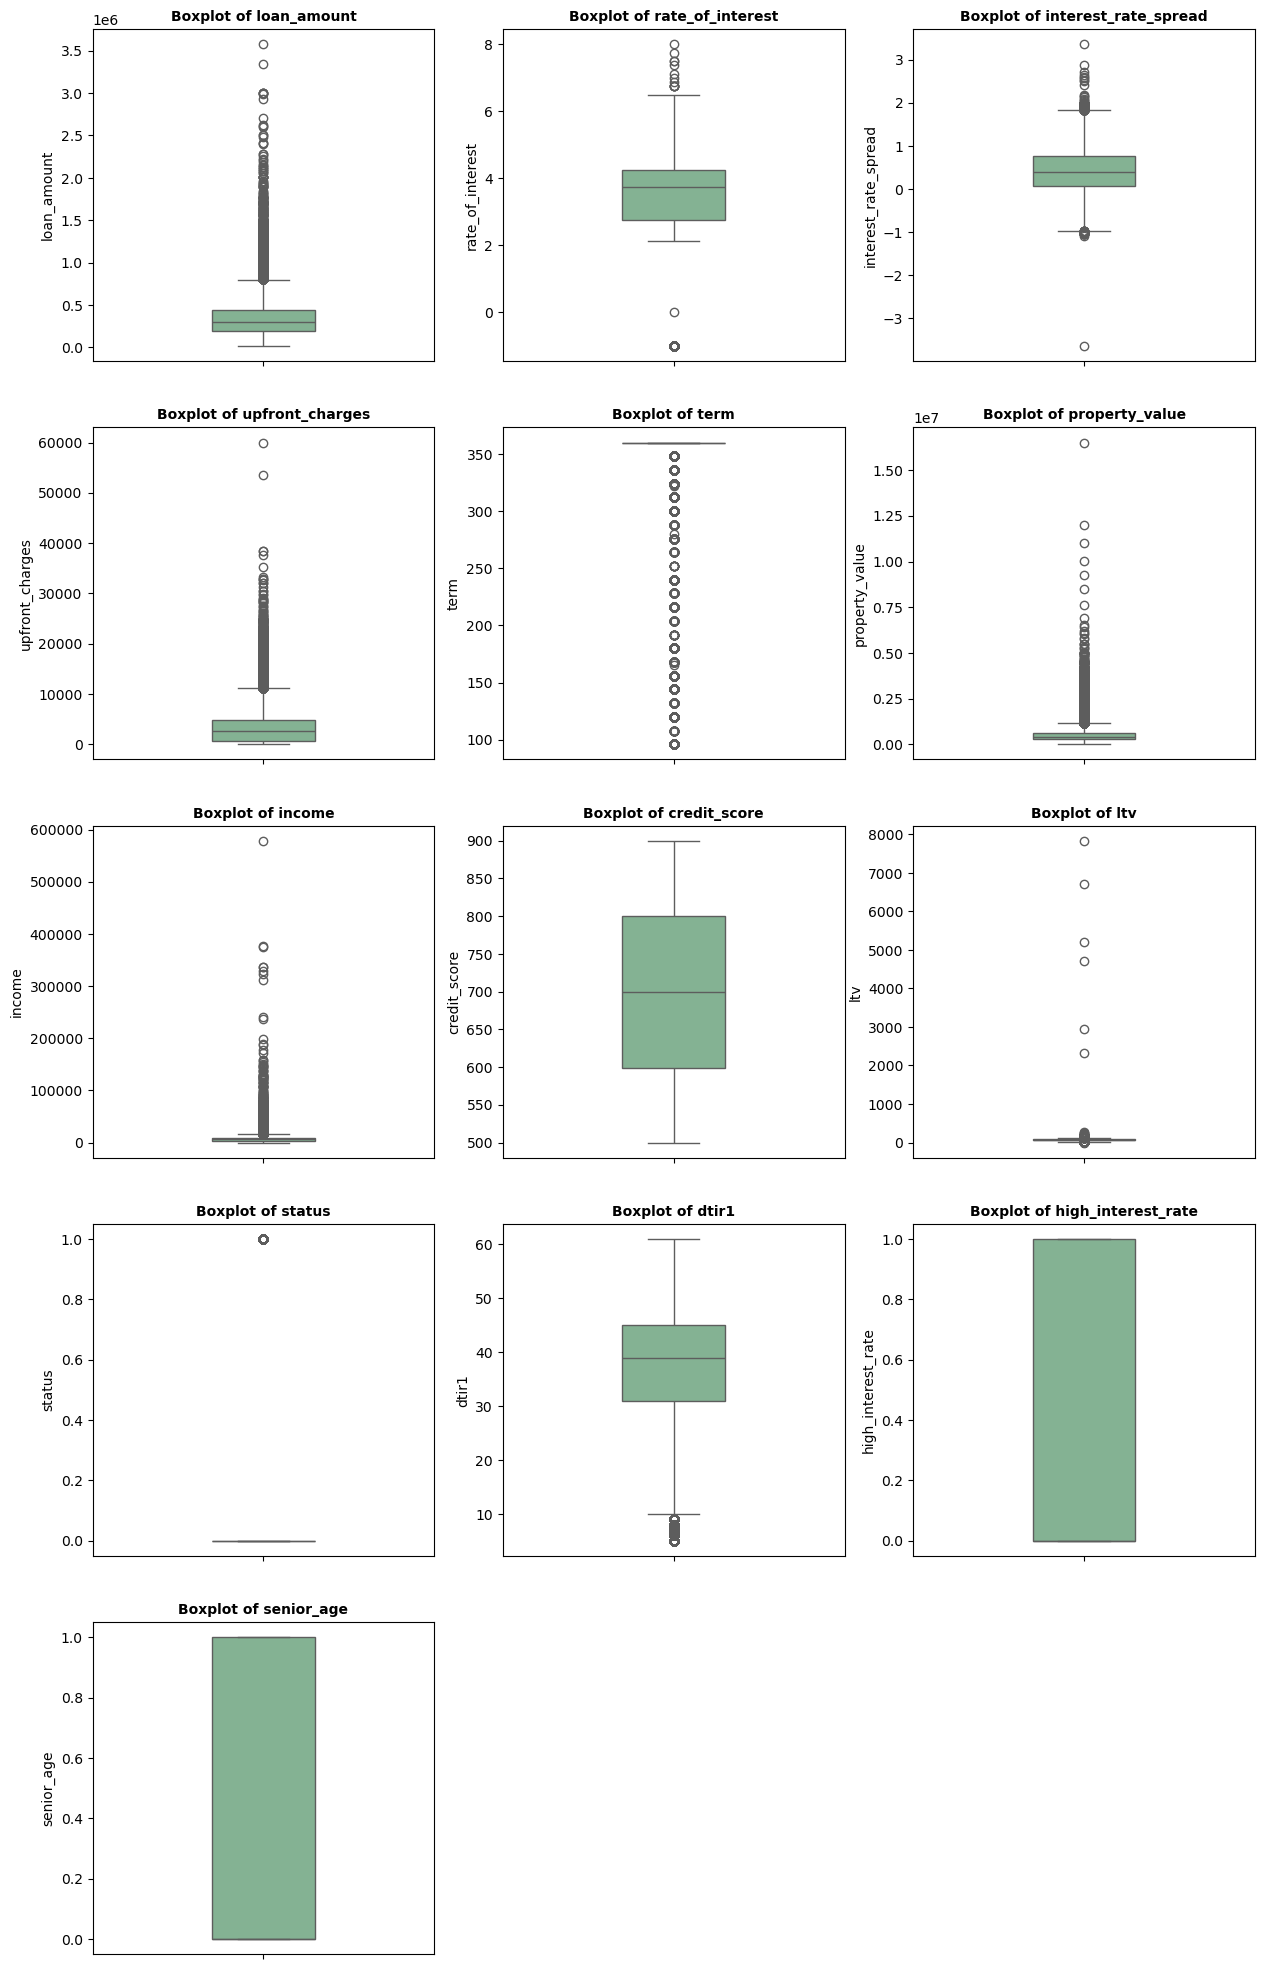

In [20]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()


for i, col in enumerate(df_loan_numeric.columns):
    # removing null/NaN values before plotting it on the boxplot
    sns.boxplot(y=df_loan_numeric[col].dropna(), ax=axes[i], width=0.3)
    sns.set_palette("crest")
    axes[i].set_title(f"Boxplot of {col}", fontweight="bold", fontsize=10)

# max(i) is 13 here, but the grid is for 15 subplots and I need to hide the empty ones
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()


In [21]:
# check the distribution of the next features in the dataset
dist_feature_names = ["status", "high_interest_rate", "senior_age"]
df_dist = df_loan_numeric[dist_feature_names]

In [22]:
def calc_subplot_grid(df: pd.DataFrame, cols: int):
    rows = math.ceil(len(df.columns) / cols)
    return rows, cols

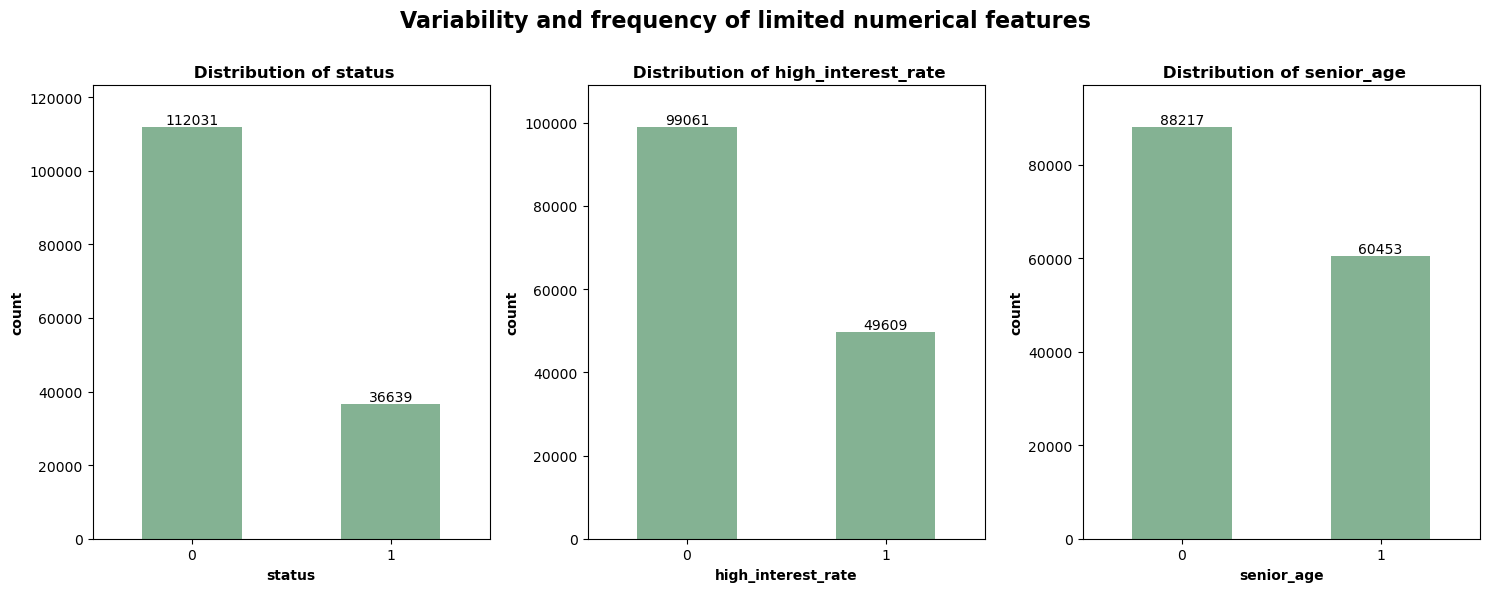

In [23]:
rows, cols = calc_subplot_grid(df_dist, 3)

fig, axes = plt.subplots(rows, cols, figsize=(rows * 15, cols * 2))
axes = axes.flatten()

for i, col in enumerate(df_dist.columns):
    sns.countplot(df_dist, x=col, ax=axes[i], width=0.5)
    sns.set_palette("crest")
    axes[i].set_title(f" Distribution of {col}", fontweight="bold", fontsize=12)
    axes[i].margins(y=0.1)
    axes[i].bar_label(axes[i].containers[0])
    axes[i].set_xlabel(col, fontweight="bold")
    axes[i].set_ylabel("count", fontweight="bold")

plt.suptitle(
    "Variability and frequency of limited numerical features",
    fontweight="bold",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.show()


In [24]:
## Conclusion
# staus '1' is very under represented
# high_interest_rate '1' is under represented
# senior_age is roughly balanced
# later we need to take this into consideration when doing the balancing


### 2.2.3 Multivariate analysis for numerical data

Applying correlation matrix and heatmap

In [25]:
# including target variable in correlation matrix is a standard
# helps to reveal potential predictor variables

# pandas corr() excludes null, NaN, NA for the calculation of correlation matrix
corr = round(df_loan_numeric.corr(), 2)

<Axes: >

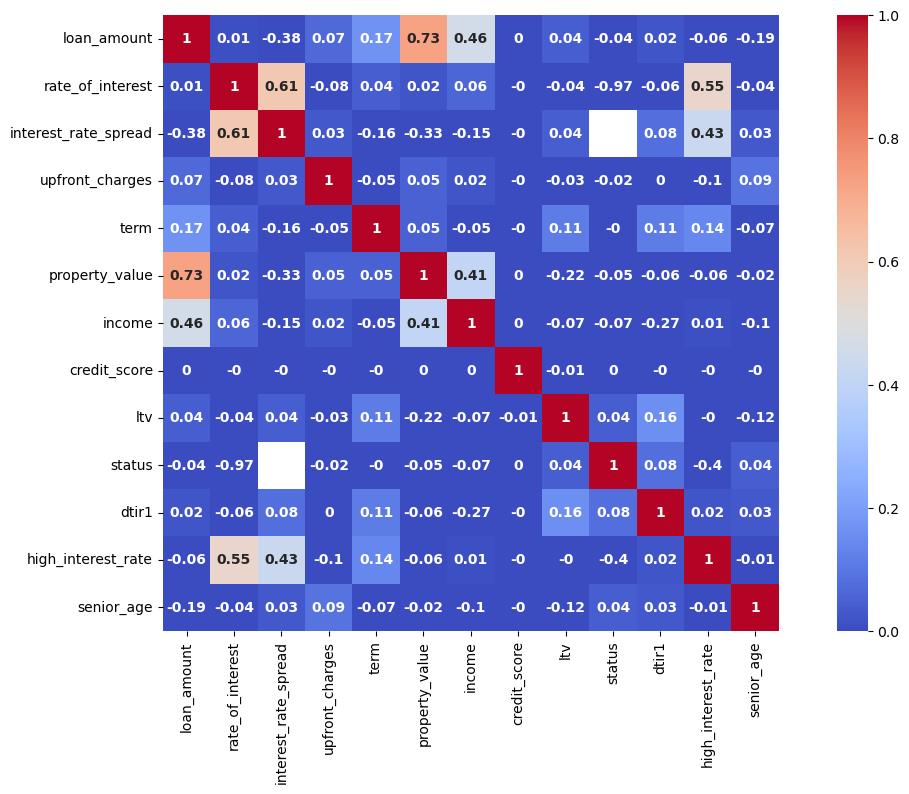

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    square=True,
    vmin=0,
    vmax=1,
    annot_kws={"fontweight": "bold"},
)

In [27]:
df_loan_numeric.columns

Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'status', 'dtir1', 'high_interest_rate', 'senior_age'],
      dtype='object')

## 2.3 Exploratory Data Analysis for categorical features

In [28]:
# select all the non-numerical features from the loan dataset
df_loan_cat = df_loan.select_dtypes(include="object")

### 2.3.1 Handle inconsistent labels/values

In [29]:
# replace '<25' label to '0-25' in age column to keep consistancy in naming
df_loan_cat.loc[df_loan_cat["age"] == "<25", "age"] = "0-25"
df_loan.loc[df_loan["age"] == "<25", "age"] = "0-25"

# fix inconsitent region names south -> South, central -> Central etc
df_loan_cat.loc[df_loan_cat["region"] == "central", "region"] = "Central"
df_loan_cat.loc[df_loan_cat["region"] == "south", "region"] = "South"
df_loan_cat.loc[df_loan_cat["security_type"] == "Indriect", "security_type"] = (
    "indirect"
)

### 2.3.2 Univariate analysis for categorical data

In [30]:
# null values by column
# df_loan.isnull().sum()

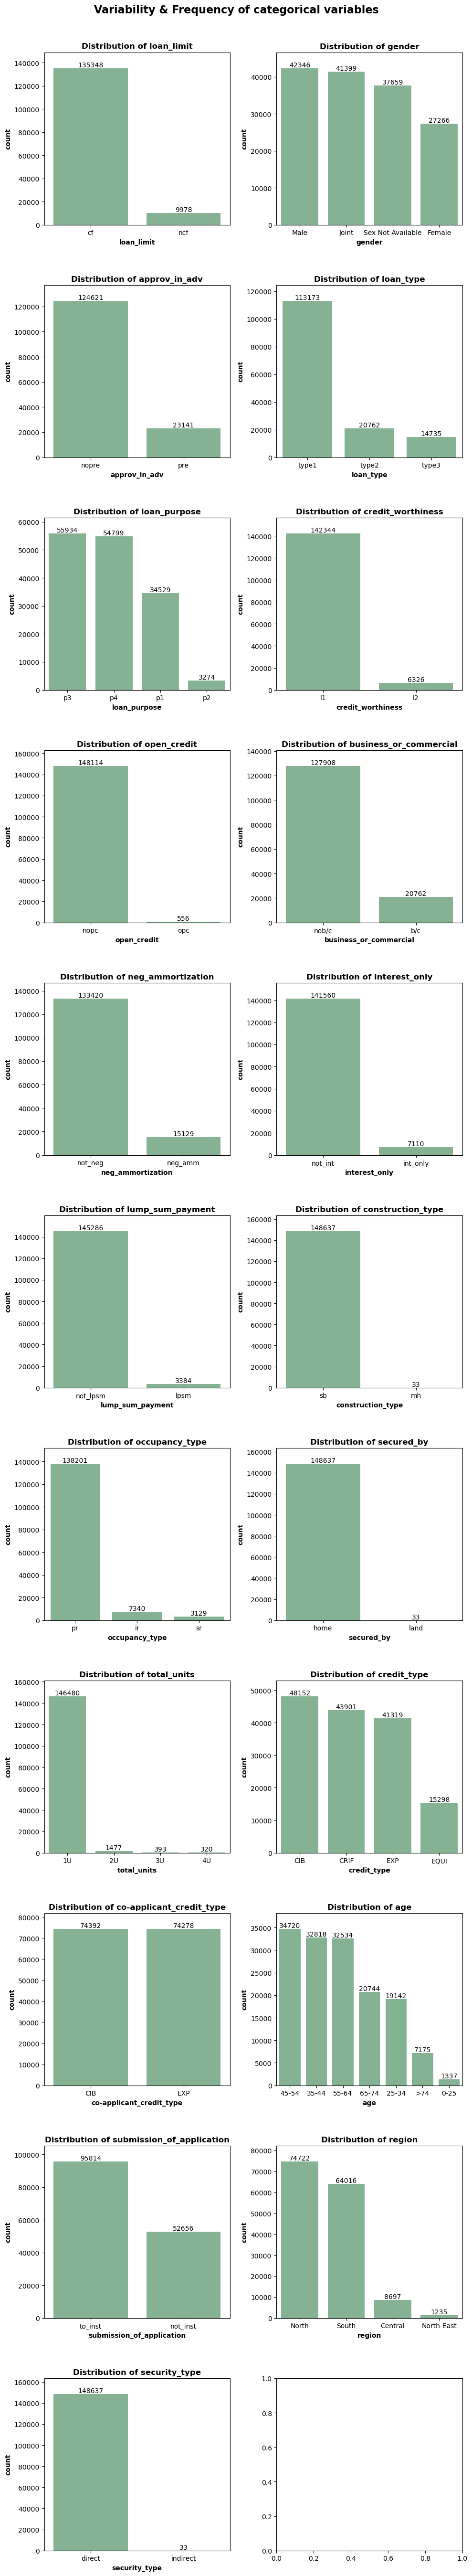

In [31]:
# calculate a gird for the subplots
rows, cols = calc_subplot_grid(df_loan_cat, 2)

# check variety of values in categorical data
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(df_loan_cat.columns):
    sns.countplot(
        data=df_loan_cat, x=col, ax=axes[i], order=df_loan_cat[col].value_counts().index
    )
    sns.set_palette("crest")
    axes[i].set_title(f"Distribution of {col}", fontweight="bold", fontsize=12)
    axes[i].bar_label(axes[i].containers[0])
    axes[i].margins(y=0.1)
    axes[i].tick_params(axis="x", rotation=0)
    axes[i].set_xlabel(col, fontweight="bold")
    axes[i].set_ylabel("count", fontweight="bold")


fig.suptitle(
    "Variability & Frequency of categorical variables", fontweight="bold", fontsize=16
)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.subplots_adjust(hspace=0.35)
plt.show()

In [32]:
# Conclusion

# No high-cardinality features are detected / the variability of categorical features < 8 in every column
# (The value set is not much)
# Imbalanced categorical features

# - loan_limit
# - approv_in_adv
# - loan_type
# - credit_worthiness
# - open_credit
# - business_or_commercial
# - neg_ammortization
# - interest_only
# - lump_sum_payment
# - construction_type
# - occupancy_types
# - secured_by
# - total units
# - region
# - security_type

### 2.3.3 Multivariate analysis

Apply frequency table method to categorical features + target value

In [33]:
# parameters: pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

# frequency/ contingency table / two-way frequency table
def relative_frequency_table(data: pd.DataFrame, col: str, column: str):
    freq_table = pd.crosstab(index=data[col], columns=data[column], margins=True)
    rel_table = round(freq_table / freq_table.loc["All"], 3) * 100
    return rel_table


# make a special form of the frequency table to make it redy to plot on a groupped barchart
# applying melt() to transform the DataFrame
def melt_df_for_barplot(
    data: pd.DataFrame, id_feature: str, feature_name: str, new_value_name: str
):
    # loan_status_relfreq.index.name='status'
    data = data.iloc[:-1, :-1]
    df_melt = data.reset_index().melt(
        id_vars=id_feature, var_name=feature_name, value_name=new_value_name
    )
    return df_melt

In [34]:
target_var = "status"

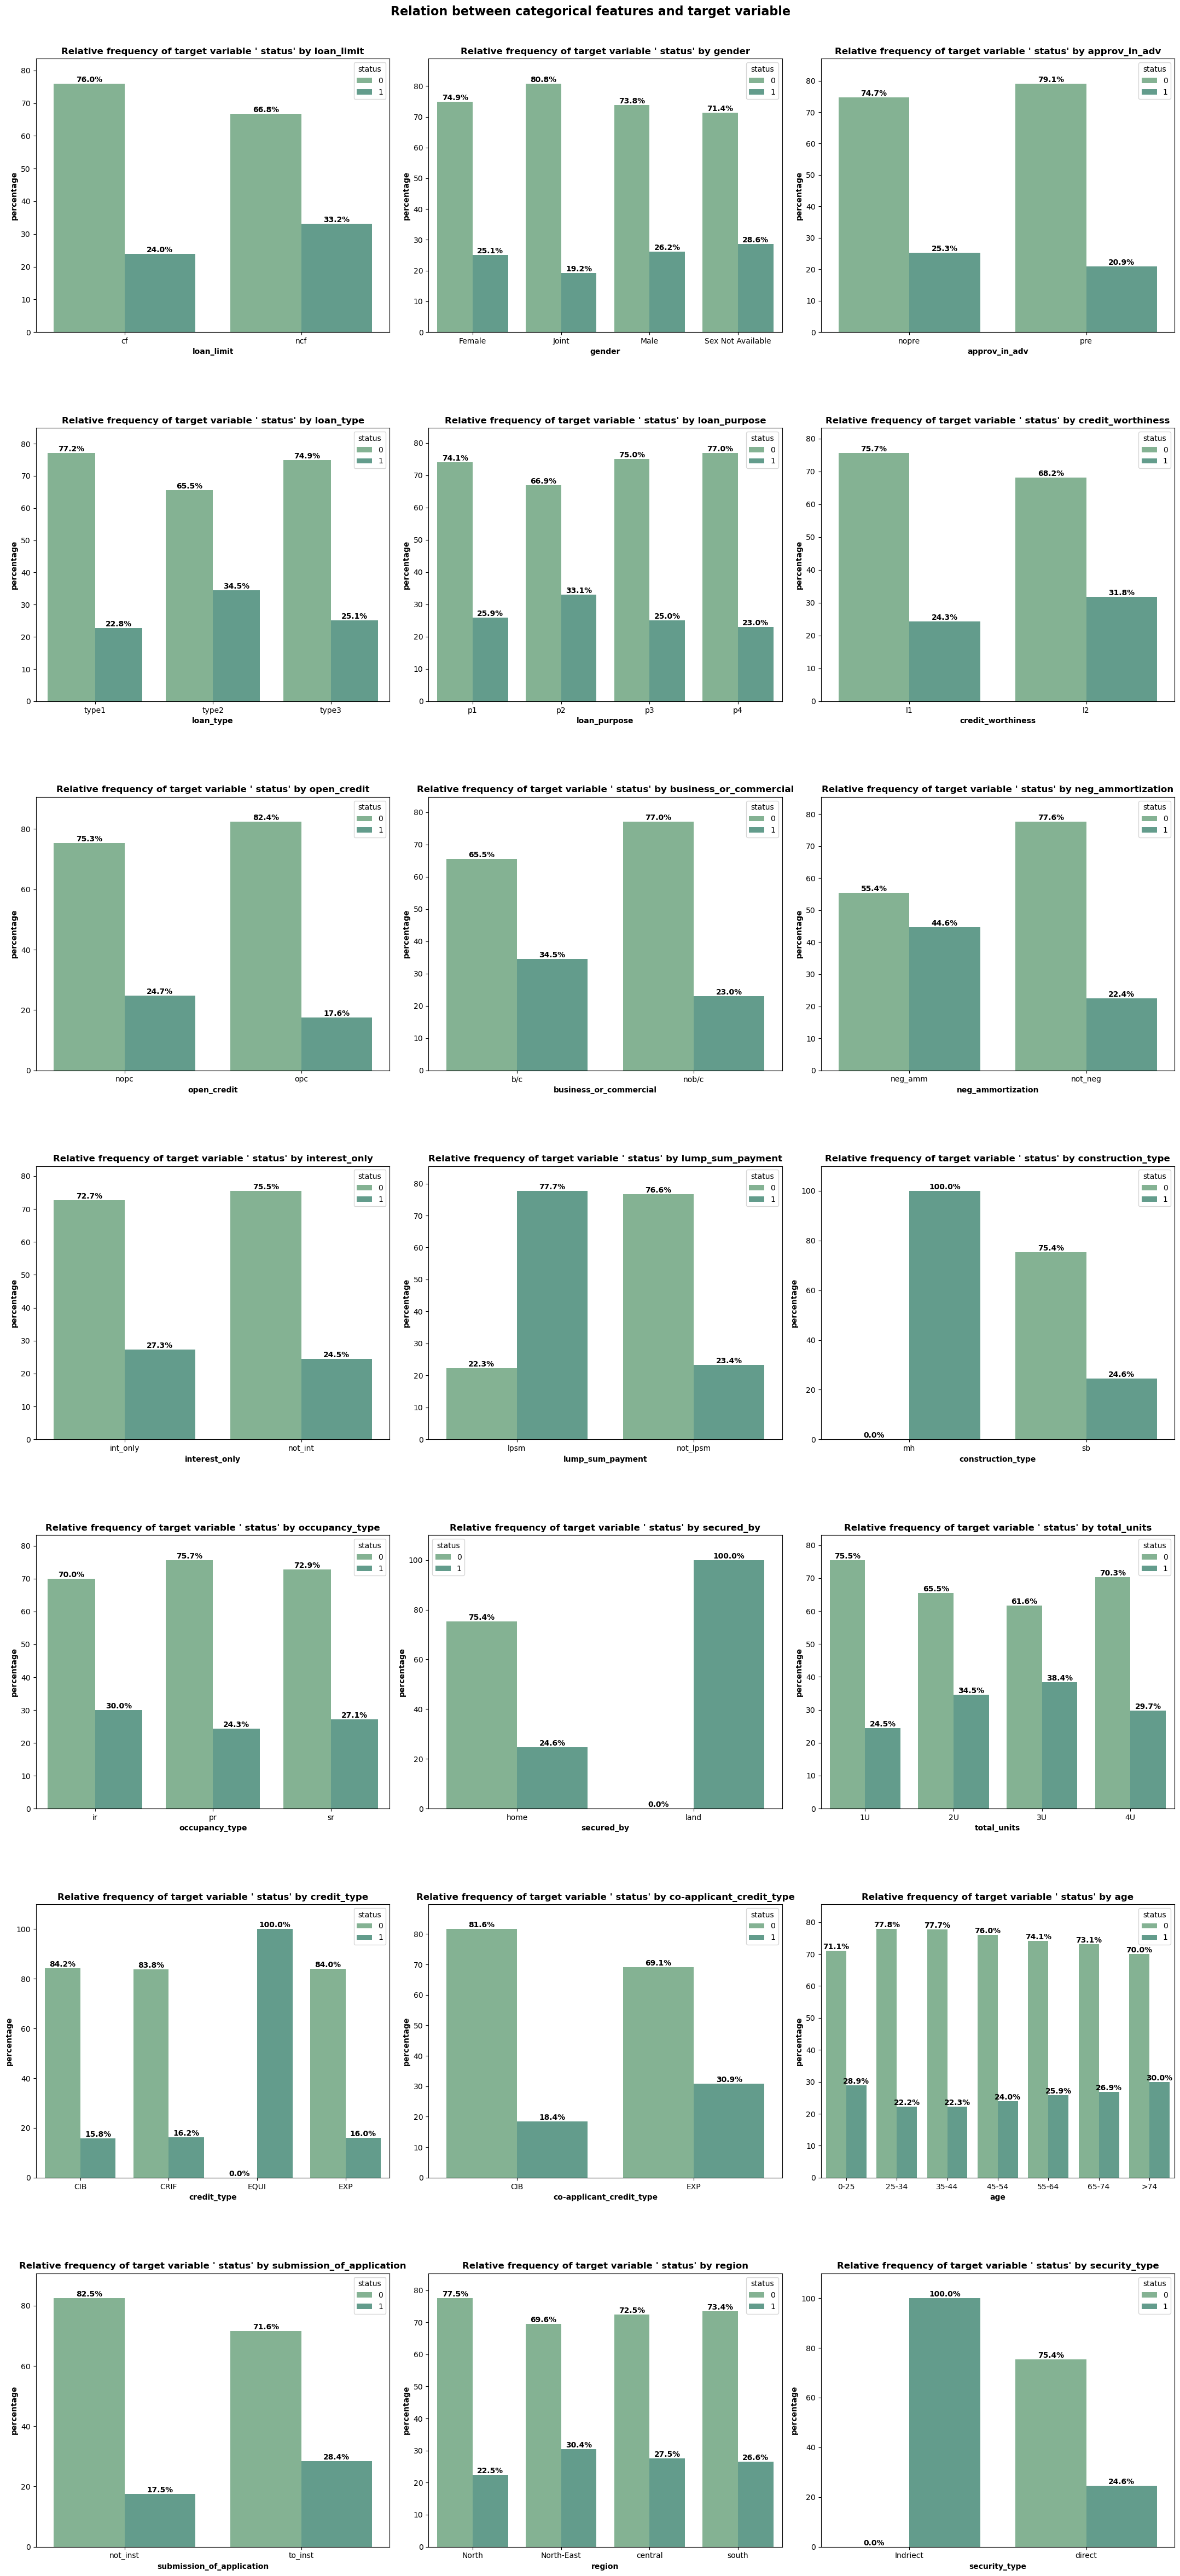

In [35]:
rows, cols = calc_subplot_grid(df_loan_cat, 3)
fig, axes = plt.subplots(rows, cols, figsize=(rows * 3.1, cols * 16))
axes = axes.flatten()

for i, col in enumerate(df_loan_cat.columns):
    status_relfreq = relative_frequency_table(df_loan, target_var, col)
    df_melt = melt_df_for_barplot(
        status_relfreq,
        id_feature=target_var,
        feature_name=col,
        new_value_name="percentage",
    )
    ax = axes[i]
    bars = ax.patches

    sns.barplot(df_melt, x=col, y="percentage", hue=target_var, ax=ax)
    ax.set_title(
        f"Relative frequency of target variable ' {target_var}' by {col}",
        fontweight="bold",
        fontsize=12,
    )
    ax.margins(y=0.1)
    ax.set_xlabel(col, fontweight="bold")
    ax.set_ylabel("percentage", fontweight="bold")

    # Real values from your melted DataFrame
    bar_labels = df_melt["percentage"].tolist()

    # Loop through only real bars, ignore ghost bars
    for bar, label in zip(bars, bar_labels):
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(
                f"{height:.1f}%",
                (bar.get_x() + bar.get_width() / 2, height),
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
            )


# Each bar is a matplotlib.patches.Rectangle
# Retrieve them through ax.patches
# bar.get_height() # height of the current bar to write value on
# bar.get_x(): get the position of left edge of the bar
# bar.get_width(): get the with of the current bar
# to avoid plotting ghost bars with labels 0.0%, I need the 'percentages' by each variable from df_melt to keep real bars only

fig.suptitle(
    "Relation between categorical features and target variable",
    fontweight="bold",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.subplots_adjust(hspace=0.35)
plt.show()

In [36]:
loan_status_relfreq = relative_frequency_table(df_loan, "status", "age")

melted_df = melt_df_for_barplot(loan_status_relfreq, "status", "age", "percentages")


## 2.4 Identifying missing value mechanisms

In [37]:
def create_missing_value_indicators(data: pd.DataFrame):
    df_cols = data.columns
    for col in df_cols:
        if data[col].isna().sum() > 0:
            data["missing_" + col] = data[col].isna().astype(int)
    return data


In [43]:
df_mval_indicator = create_missing_value_indicators(df_loan)

C:\Users\Dominik\AppData\Local\Temp\ipykernel_19588\3387944981.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Approval")


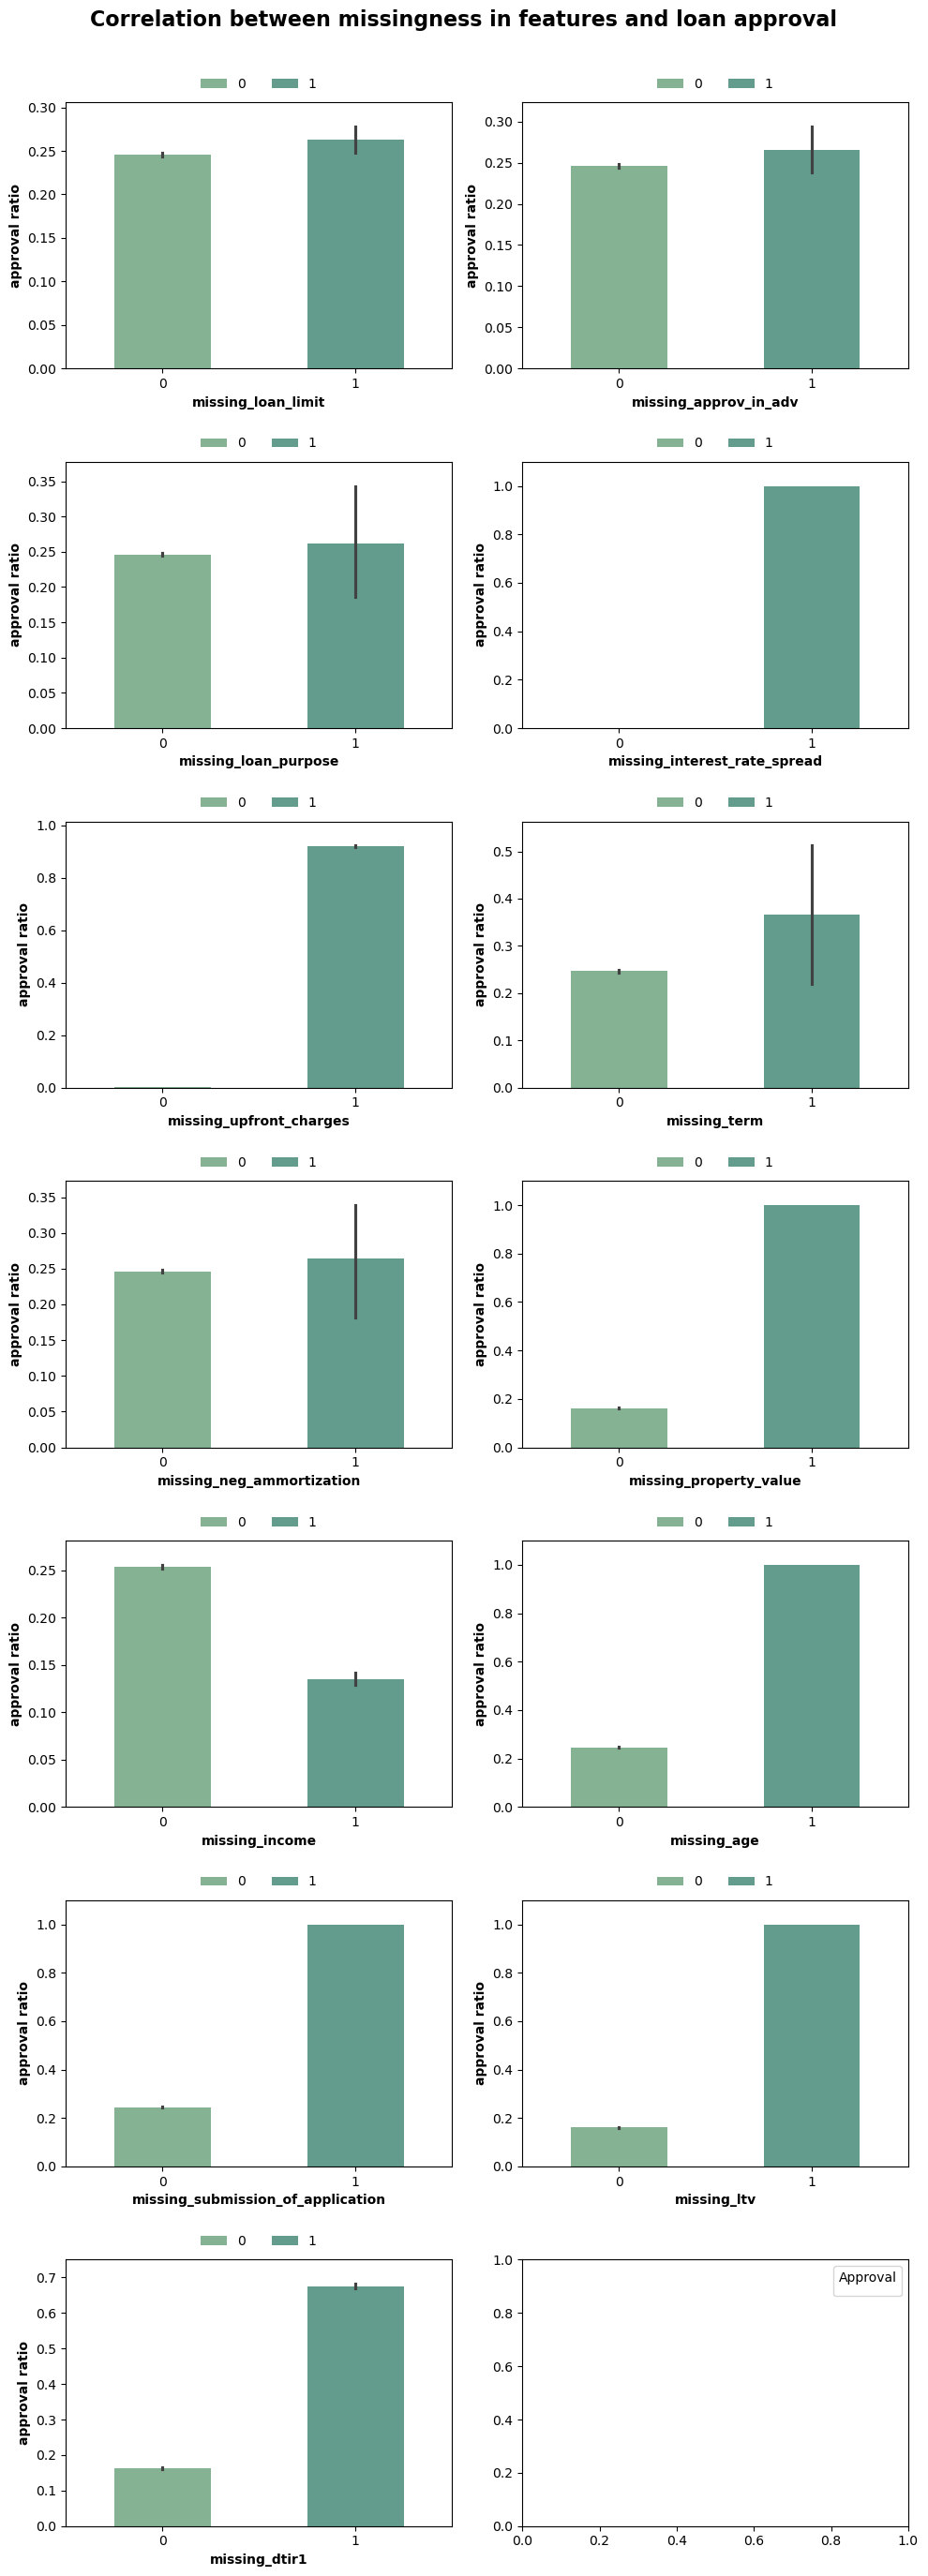

In [74]:
rows = 7
cols = 2


fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()


i = 0
for col in df_mval_indicator.columns:
    if col.startswith("missing_"):
        ax = axes[i]
        sns.barplot(
            x=df_mval_indicator[col],
            y=df_mval_indicator[target_var],
            hue=df_mval_indicator[col],
            ax=ax,
            width=0.5
        )
        sns.move_legend(ax,"lower center",bbox_to_anchor=(.5,1), ncols=3, title=None,frameon=False)
        ax.margins(y=0.1)
        ax.set_xlabel(col, fontweight="bold")
        ax.set_ylabel("approval ratio", fontweight="bold")
        i = i + 1

fig.suptitle(
    "Correlation between missingness in features and loan approval",
    fontweight="bold",
    fontsize=16,
)
plt.legend(title="Approval")
plt.tight_layout(rect=[0, 0, 1, 0.975])
plt.subplots_adjust(hspace=0.35)
plt.show()


In [ ]:
for i, col in enumerate(df_loan_cat.columns):
    status_relfreq = relative_frequency_table(df_loan, target_var, col)
    df_melt = melt_df_for_barplot(
        status_relfreq,
        id_feature=target_var,
        feature_name=col,
        new_value_name="percentage",
    )
    ax = axes[i]
    bars = ax.patches

    sns.barplot(df_melt, x=col, y="percentage", hue=target_var, ax=ax)
    ax.set_title(
        f"Relative frequency of target variable ' {target_var}' by {col}",
        fontweight="bold",
        fontsize=12,
    )
    ax.margins(y=0.1)
    ax.set_xlabel(col, fontweight="bold")
    ax.set_ylabel("percentage", fontweight="bold")

    # Real values from your melted DataFrame
    bar_labels = df_melt["percentage"].tolist()

    # Loop through only real bars, ignore ghost bars
    for bar, label in zip(bars, bar_labels):
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(
                f"{height:.1f}%",
                (bar.get_x() + bar.get_width() / 2, height),
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
            )